# Grid world path optimization using genetic algorithms

## Importing modules

In [1]:
import os
from typing import List, Tuple

import matplotlib.pyplot as plt

from IPython.display import Video

import functions as fn
import simulations as sm

## Parameters

In [2]:
# Grid parameters
GRID_SIZE: Tuple[int, int] = (10, 15)
START_POSITION: Tuple[int, int] = (6, 1)
END_POSITION: Tuple[int, int] = (4, 13)
OBSTACLES: List[Tuple[int, int]] = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14),
    (1, 0), (1, 3), (1, 14), (2, 0), (2, 3), (2, 5), (2, 6), (2, 7), (2, 11), (2, 14), (3, 0), (3, 3), (3, 10), (3, 11), (3, 13), 
    (3, 14), (4, 0), (4, 3), (4, 9), (4, 10), (4, 11), (4, 14), (5, 0), (5, 3), (5, 6), (5, 11), (5, 13), (5, 14), (6, 0), (6, 6), 
    (6, 9), (6, 11), (6, 14), (7, 0), (7, 6), (7, 9), (7, 14), (8, 0), (8, 3), (8, 6), (8, 14), (9, 0), (9, 1), (9, 2), (9, 3), 
    (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14)
]
NUM_OPTIMAL_STEPS: int = 20

# Simulation parameters
CHROMOSOME_LENGTH: int = 64
POPULATION_SIZE: int = 100
NUM_GENERATIONS: int = 1000
BIAS: int = 3
PROGRESSIVE_MUTATION: bool = True
MUTATION_RATE: float = 0.01
EARLY_STOP: bool = False
BEST_ONES_PERCENTAGE: float = 0.1
WORST_ONES_PERCENTAGE: float = 0.2
REVISIT_POSSIBLE: bool = True

# Visualization
WINDOW_SIZE: int = 10

# Paths
RESULTS_PATH: str = "./results"
GA_RESULTS_PATH: str = f"{RESULTS_PATH}/GA results"
GA_VERSION_PATH: str = f"{GA_RESULTS_PATH}/reentrant fields" if not PROGRESSIVE_MUTATION else f"{GA_RESULTS_PATH}/non-reentrant fields"
ALL_TO_ALL_RESULTS_PATH: str = f"{GA_VERSION_PATH}/all to all results"
ALL_TO_ALL_VIDEO_PATH: str = f"{GA_VERSION_PATH}/all_to_all_results.mp4"
BEST_TO_REST_RESULTS_PATH: str = f"{GA_VERSION_PATH}/best to rest results"
BEST_TO_REST_VIDEO_PATH: str = f"{GA_VERSION_PATH}/best_to_rest_results.mp4"
HYBRID_RESULTS_PATH: str = f"{GA_VERSION_PATH}/hybrid results"
HYBRID_VIDEO_PATH: str = f"{GA_VERSION_PATH}/hybrid_results.mp4"

# Other
RANDOM_STATE: int = 42
LINE: str = 100*'-'
DOUBLE_LINE: str = 100*'='
SIMULATION_STARTED: str = 36*'-' + " !!! SIMULATION STARTED !!! " + 36*'-'
SIMULATION_FINISHED: str = 36*'-' + " !!! SIMULATION FINISHED !!! " + 35*'-'

## Results directories creation

In [3]:
os.makedirs(RESULTS_PATH, exist_ok=True)
os.makedirs(GA_RESULTS_PATH, exist_ok=True)
for directory in [GA_VERSION_PATH, ALL_TO_ALL_RESULTS_PATH, BEST_TO_REST_RESULTS_PATH, HYBRID_RESULTS_PATH]:
    fn.create_or_empty_directory(directory)

## Grid world initialization

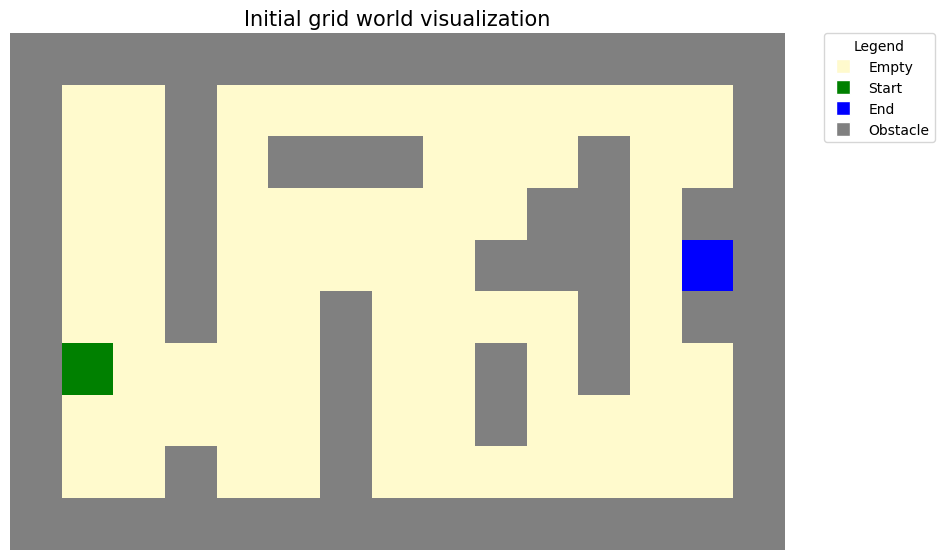

In [4]:
initial_grid_world = fn.grid_world_creation(GRID_SIZE, START_POSITION, END_POSITION, OBSTACLES)
fn.grid_world_visualization(initial_grid_world,title="Initial grid world visualization", agent_flag=0)

## All to all crossover case

### Simulation

In [5]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    initial_mutation_rate=MUTATION_RATE,
    selection_type="all to all",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    revisit_possible = REVISIT_POSSIBLE,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE  
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 2.1213 - median score: 9.5469 - mean score: 8.9777 - steps: 28
----------------------------------------------------------------------------------------------------
 4. generation finished - best score: 0.0 - median score: 6.4052 - mean score: 6.9145 - steps: 20
----------------------------------------------------------------------------------------------------
The best generation: 4
The best primary score: 0.0
The best secondary score: 20
The first full path generation: 4
Total Time: 0.18 seconds
Time per Iteration: 0.0400 seconds
Iterations per Second: 22.22
------------------------------------ !!! SIMULATION FINISHED !!! -----------------------------------


### Result scores visualization

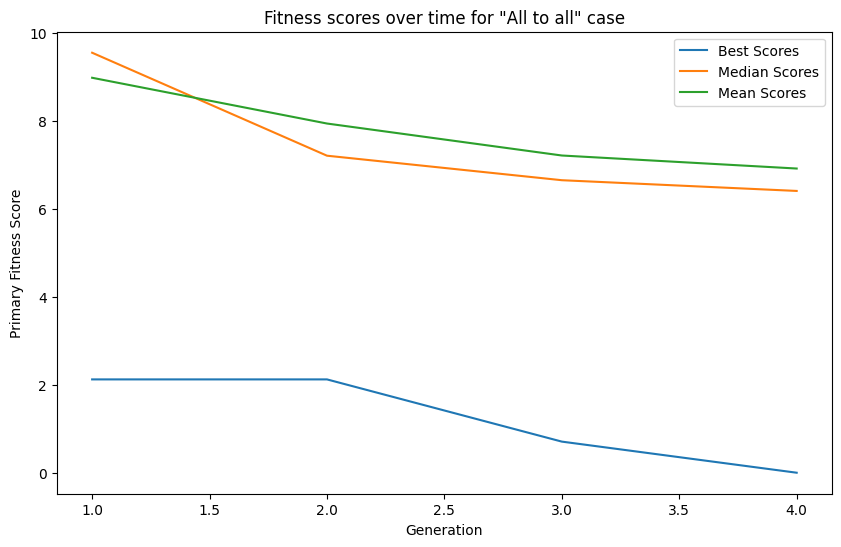

In [6]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for \"All to all\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

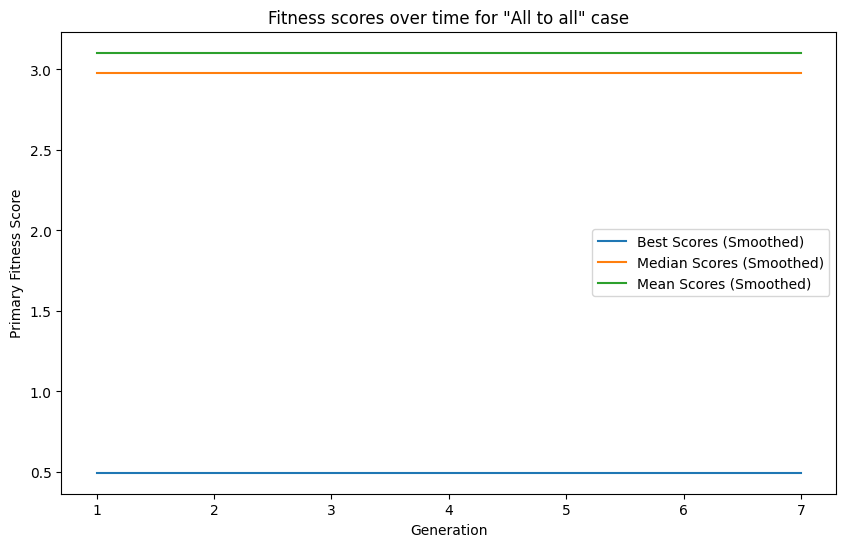

In [7]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for \"All to all\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


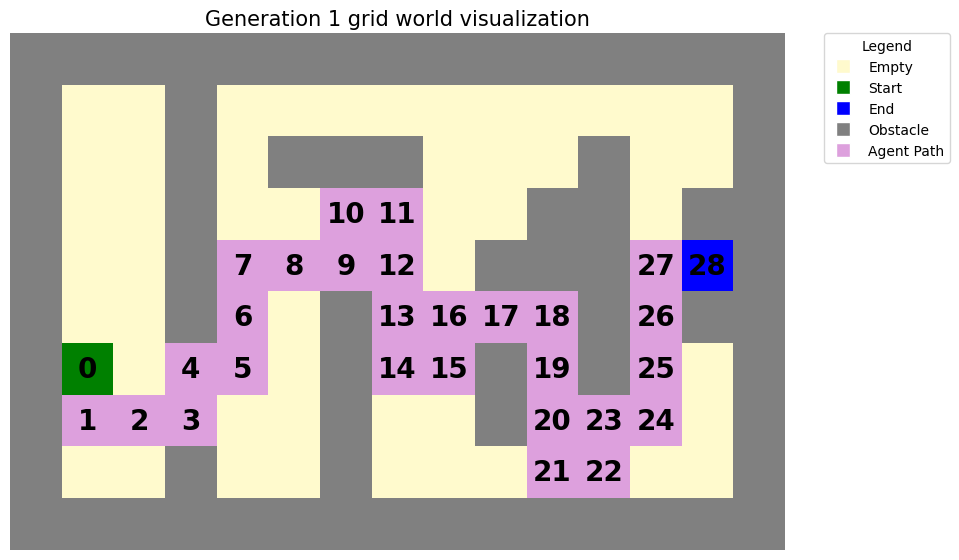

----------------------------------------------------------------------------------------------------

2. generation 2 grid world


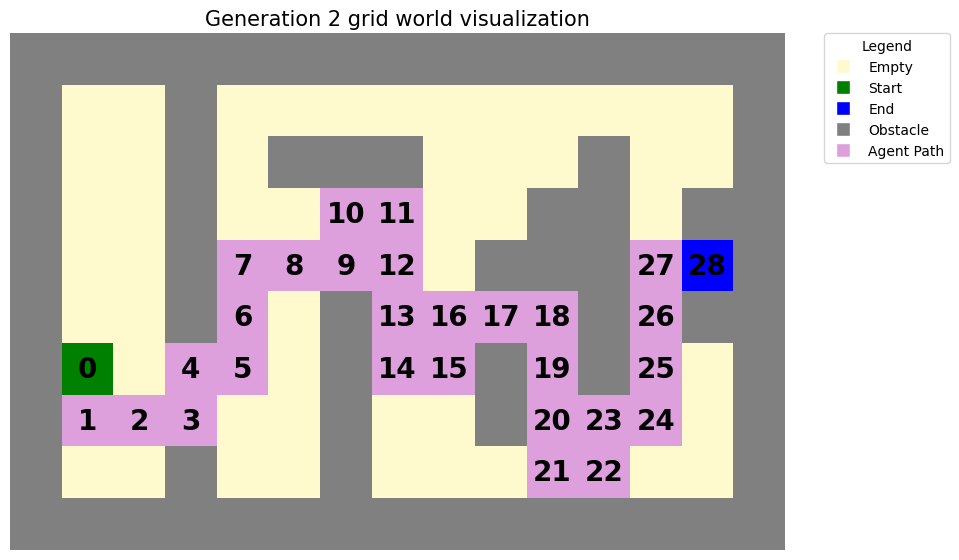

----------------------------------------------------------------------------------------------------

3. generation 3 grid world


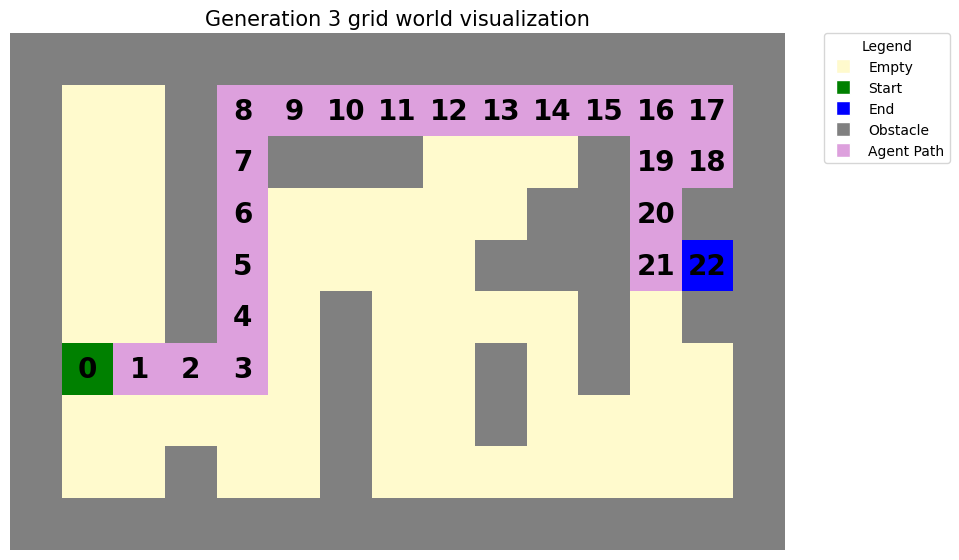

----------------------------------------------------------------------------------------------------

4. generation 4 grid world


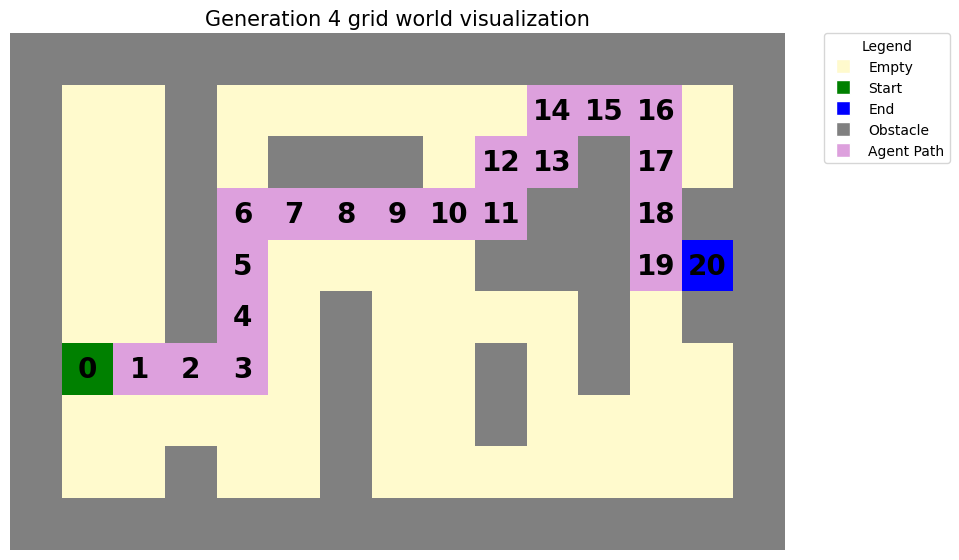

----------------------------------------------------------------------------------------------------



In [8]:
paths_progression_indices = fn.get_indices(best_generation-1)

for counter, index in enumerate(paths_progression_indices, 1):
    print(f"{counter}. generation {index + 1} grid world")
    title = f"Generation {index + 1} grid world visualization"
    fn.grid_world_visualization(best_grid_worlds[index], agent_path=best_population_paths[index], title=title, agent_flag=1)
    print(LINE)
    print()

In [9]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=ALL_TO_ALL_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    indices_list=paths_progression_indices, 
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(ALL_TO_ALL_RESULTS_PATH, ALL_TO_ALL_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 4/4 [00:50<00:00, 12.74s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/non-reentrant fields/all_to_all_results.mp4
Video creation finished!


frame=  102 fps=0.0 q=-1.0 Lsize=     163kB time=00:00:19.80 bitrate=  67.5kbits/s speed=20.1x    
video:161kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.147552%
[libx264 @ 0x55c75e955740] frame I:1     Avg QP: 9.90  size: 26128
[libx264 @ 0x55c75e955740] frame P:66    Avg QP:15.77  size:  1846
[libx264 @ 0x55c75e955740] frame B:35    Avg QP:13.18  size:   470
[libx264 @ 0x55c75e955740] consecutive B-frames: 37.3% 45.1% 17.6%  0.0%
[libx264 @ 0x55c75e955740] mb I  I16..4: 79.7%  6.1% 14.2%
[libx264 @ 0x55c75e955740] mb P  I16..4:  1.7%  0.7%  0.8%  P16..4:  1.5%  0.2%  0.1%  0.0%  0.0%    skip:95.0%
[libx264 @ 0x55c75e955740] mb B  I16..4:  0.7%  0.2%  0.3%  B16..8:  2.3%  0.1%  0.0%  direct: 0.1%  skip:96.4%  L0:45.3% L1:54.2% BI: 0.5%
[libx264 @ 0x55c75e955740] 8x8 transform intra:15.6% inter:63.9%
[libx264 @ 0x55c75e955740] coded y,uvDC,uvAC intra: 12.9% 30.6% 25.8% inter: 0.4% 0.8% 0.6%
[libx264 @ 0x55c75e955740] i16 v,h,dc,p: 70% 29%  1%  0%
[li

In [10]:
Video(ALL_TO_ALL_VIDEO_PATH, embed=True)

## The best ones to rest crossover case

### Simulation

In [11]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    initial_mutation_rate=MUTATION_RATE,
    selection_type="best to rest",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    revisit_possible = REVISIT_POSSIBLE,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE    
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 2.1213 - median score: 9.5469 - mean score: 8.9777 - steps: 28
----------------------------------------------------------------------------------------------------
 7. generation finished - best score: 0.0 - median score: 4.3574 - mean score: 5.6938 - steps: 20
----------------------------------------------------------------------------------------------------
The best generation: 7
The best primary score: 0.0
The best secondary score: 20
The first full path generation: 7
Total Time: 0.40 seconds
Time per Iteration: 0.0600 seconds
Iterations per Second: 17.50
------------------------------------ !!! SIMULATION FINISHED !!! -----------------------------------


### Result scores visualization

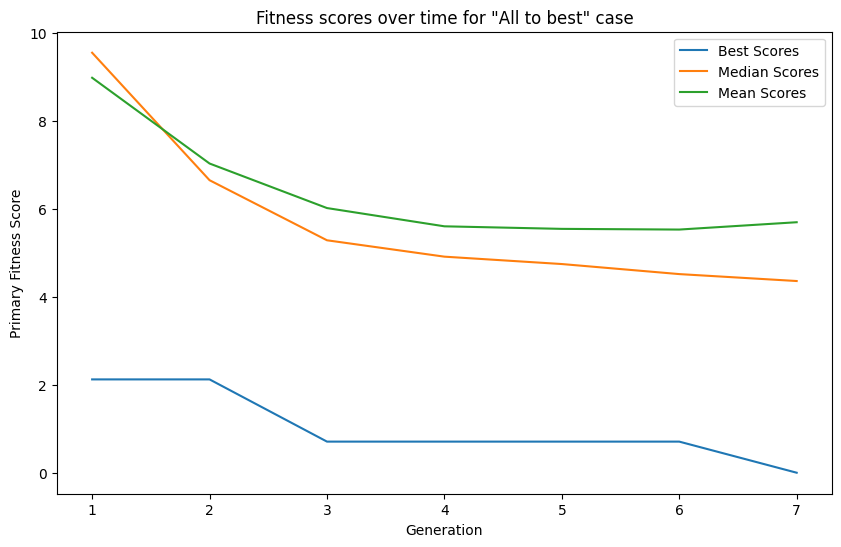

In [12]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for \"All to best\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

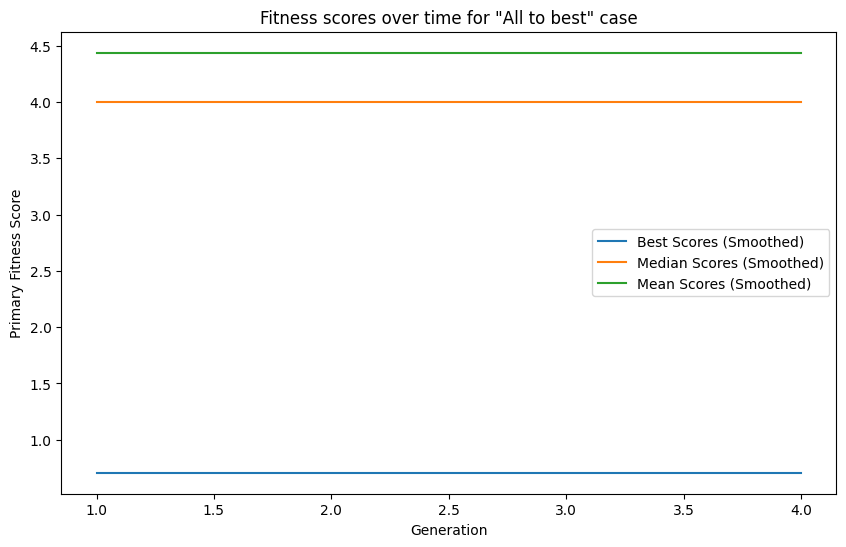

In [13]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for \"All to best\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


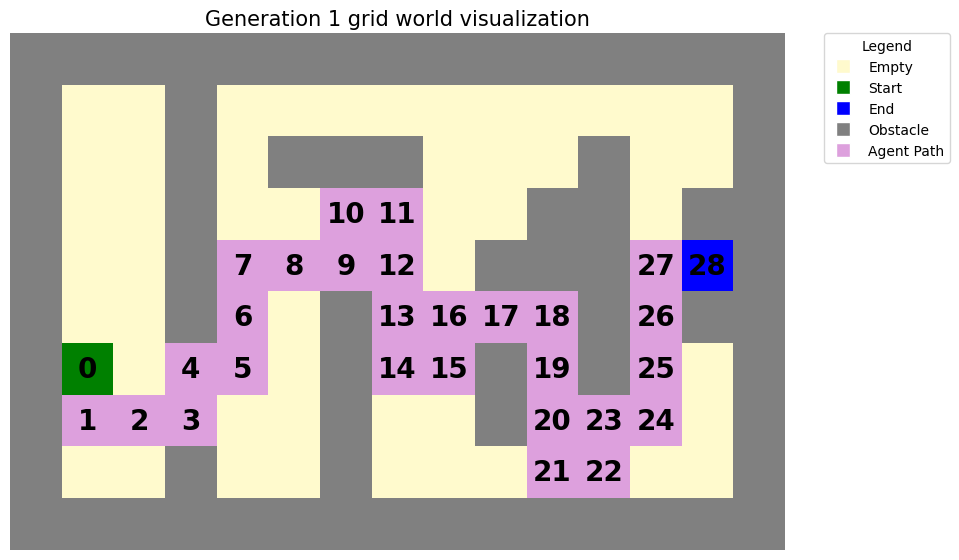

----------------------------------------------------------------------------------------------------

2. generation 2 grid world


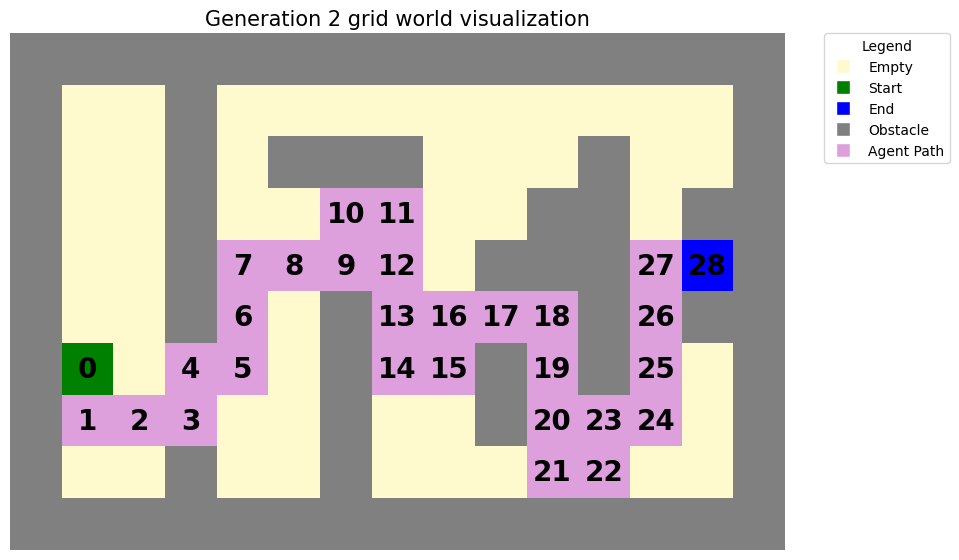

----------------------------------------------------------------------------------------------------

3. generation 3 grid world


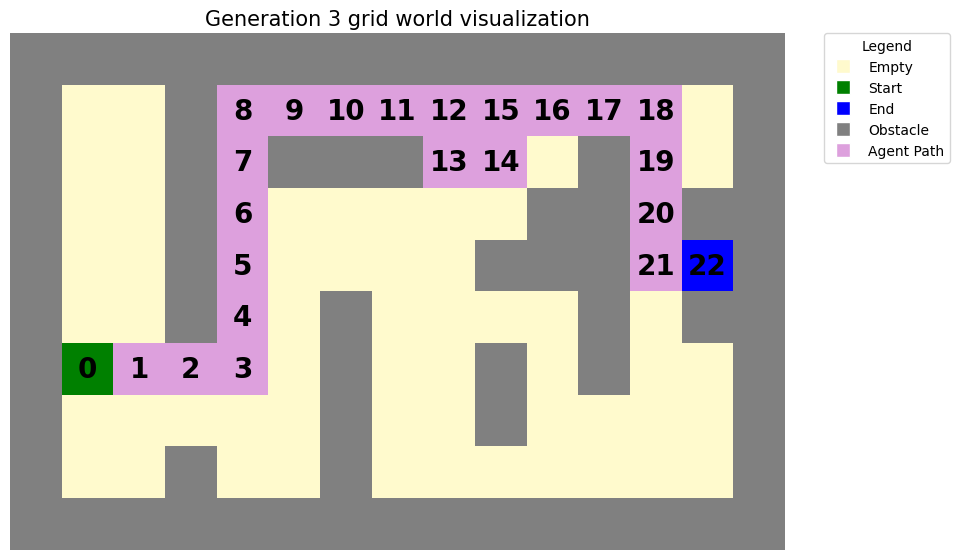

----------------------------------------------------------------------------------------------------

4. generation 4 grid world


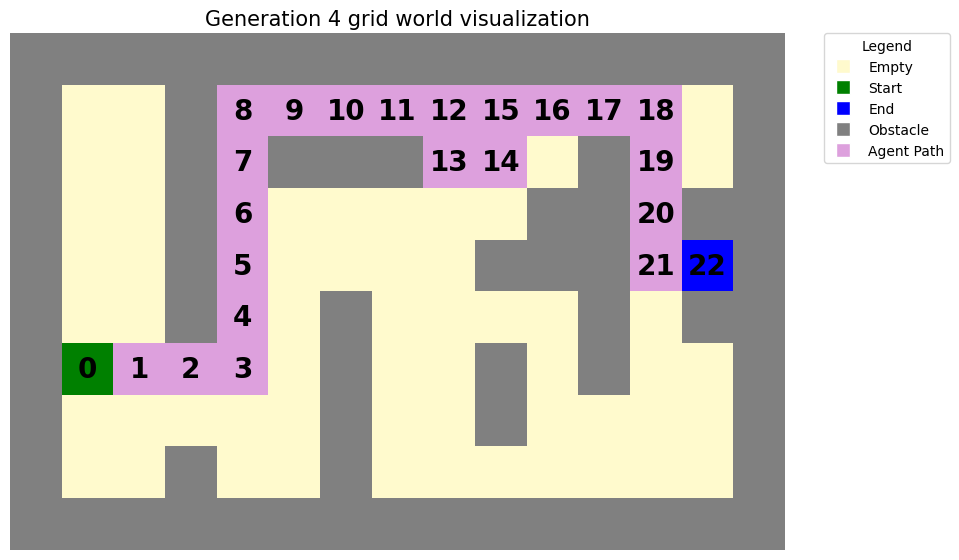

----------------------------------------------------------------------------------------------------

5. generation 5 grid world


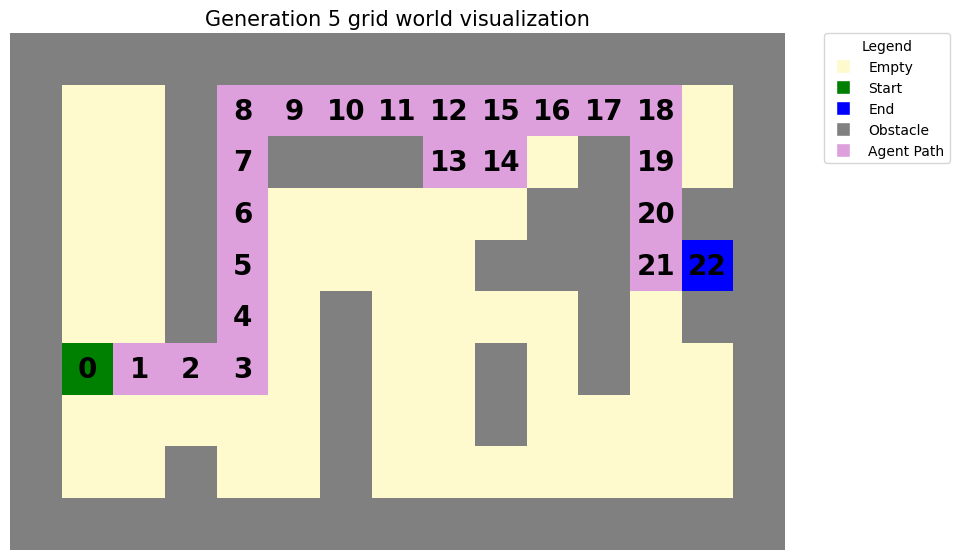

----------------------------------------------------------------------------------------------------

6. generation 6 grid world


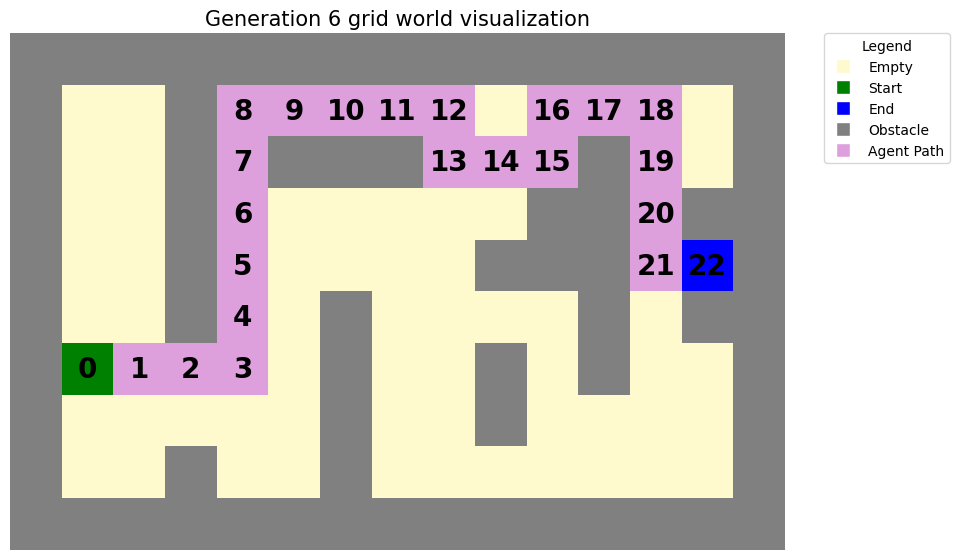

----------------------------------------------------------------------------------------------------

7. generation 7 grid world


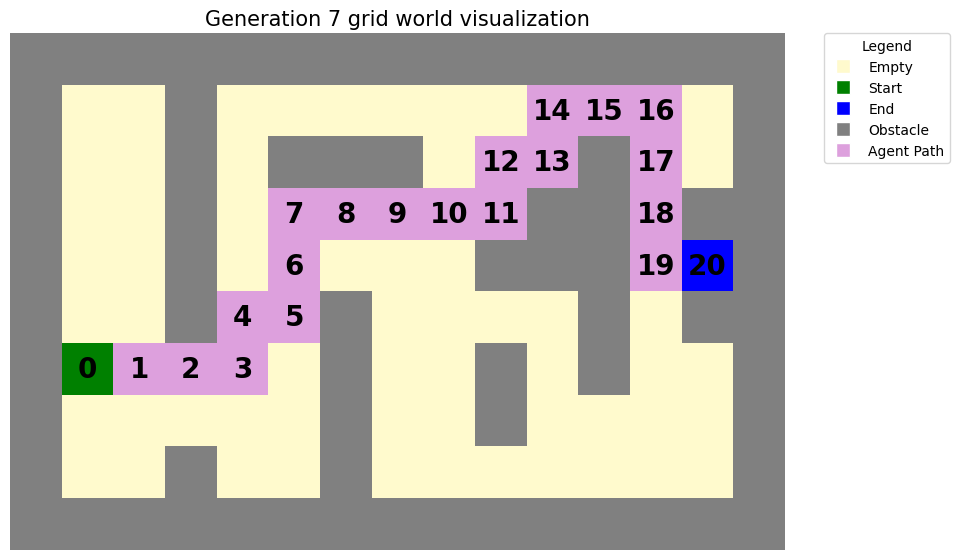

----------------------------------------------------------------------------------------------------



In [14]:
paths_progression_indices = fn.get_indices(best_generation-1)

for counter, index in enumerate(paths_progression_indices, 1):
    print(f"{counter}. generation {index + 1} grid world")
    title = f"Generation {index + 1} grid world visualization"
    fn.grid_world_visualization(best_grid_worlds[index], agent_path=best_population_paths[index], title=title, agent_flag=1)
    print(LINE)
    print()

In [15]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=BEST_TO_REST_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    indices_list=paths_progression_indices, 
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(BEST_TO_REST_RESULTS_PATH, BEST_TO_REST_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 7/7 [01:20<00:00, 11.51s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/non-reentrant fields/best_to_rest_results.mp4
Video creation finished!


In [16]:
Video(BEST_TO_REST_VIDEO_PATH, embed=True)

## Hybrid evolutionary case

### Simulation

In [17]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    initial_mutation_rate=MUTATION_RATE,
    selection_type="hybrid",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    revisit_possible = REVISIT_POSSIBLE,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE   
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 2.1213 - median score: 9.5469 - mean score: 8.9777 - steps: 28
----------------------------------------------------------------------------------------------------
 10. generation finished - best score: 2.1213 - median score: 5.9797 - mean score: 6.5253 - steps: 28
----------------------------------------------------------------------------------------------------
 20. generation finished - best score: 1.5812 - median score: 5.4578 - mean score: 5.4812 - steps: 26
----------------------------------------------------------------------------------------------------
 30. generation finished - best score: 1.5812 - median score: 5.1516 - mean score: 5.7297 - steps: 26
----------------------------------------------------------------------------------------------------
 40. generation finished - best score: 1.5812 - median score: 4.7434 - mean score: 5.271

### Result scores visualization

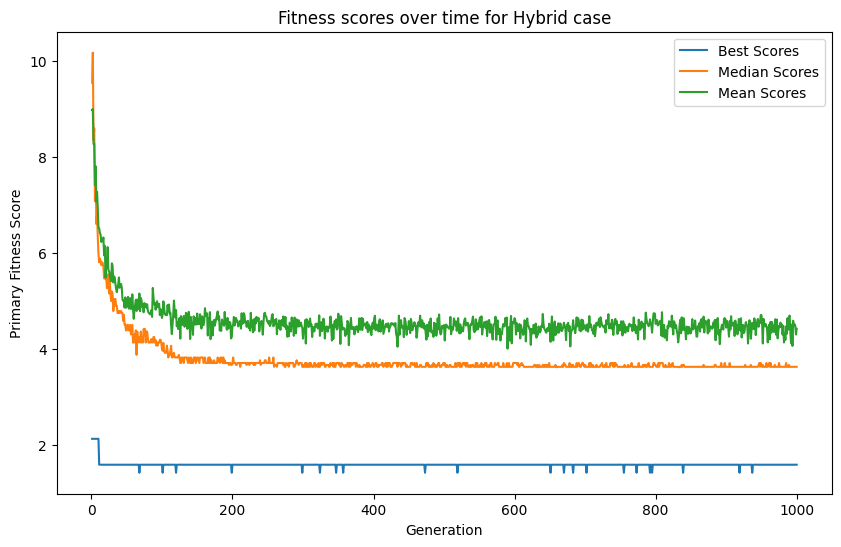

In [18]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for Hybrid case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

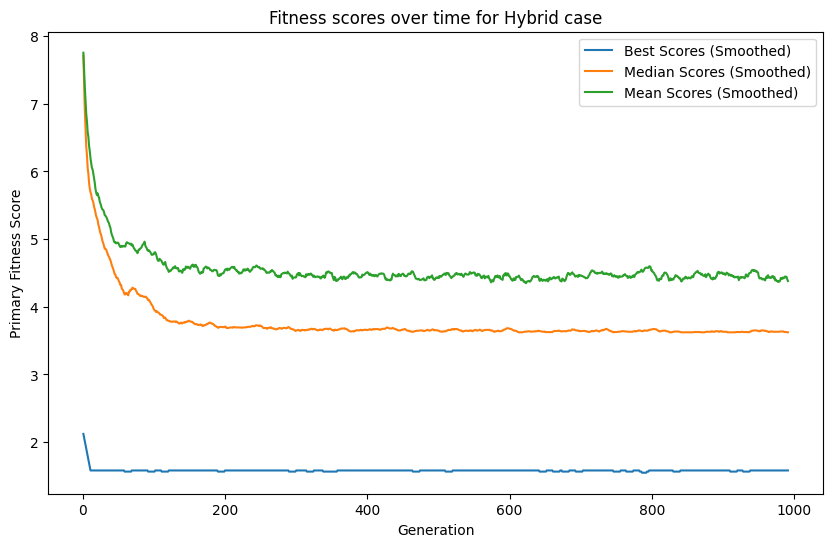

In [19]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for Hybrid case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


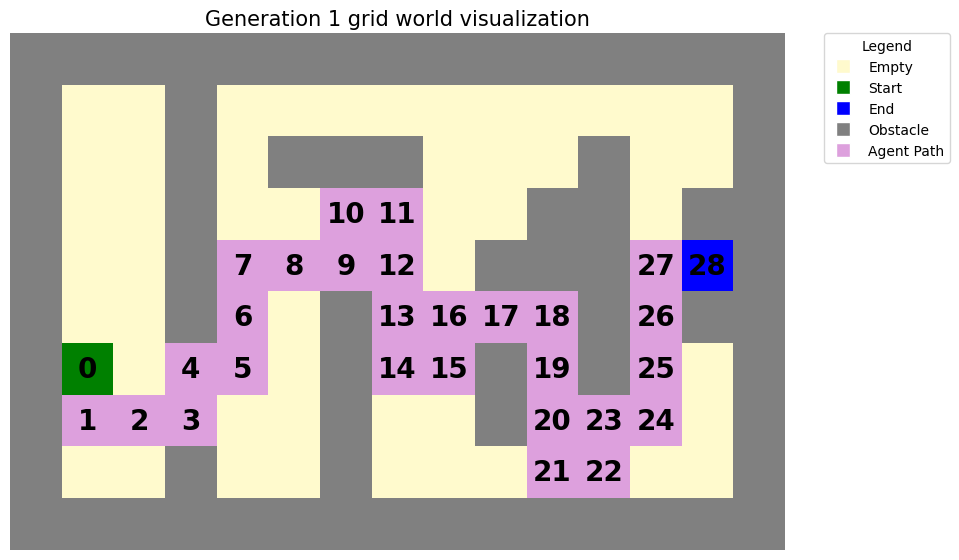

----------------------------------------------------------------------------------------------------

2. generation 8 grid world


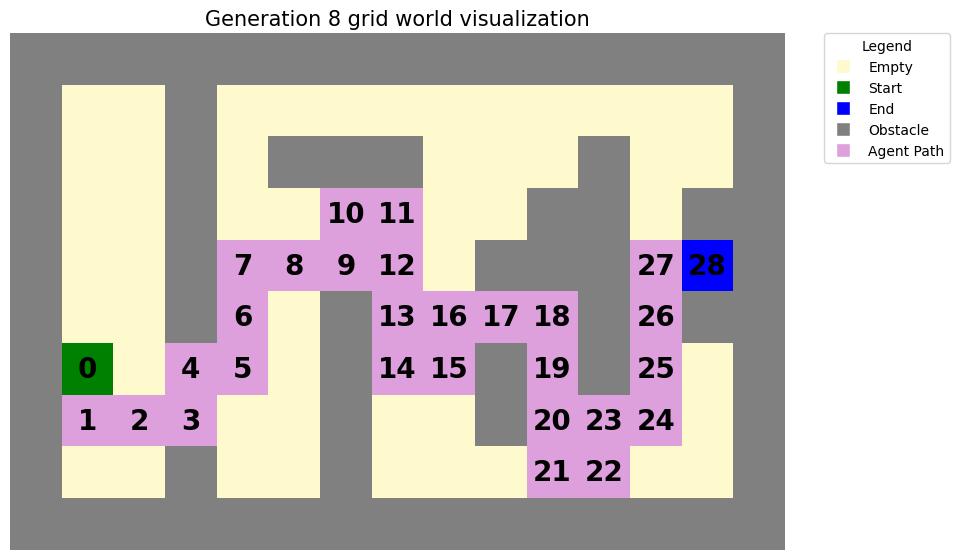

----------------------------------------------------------------------------------------------------

3. generation 16 grid world


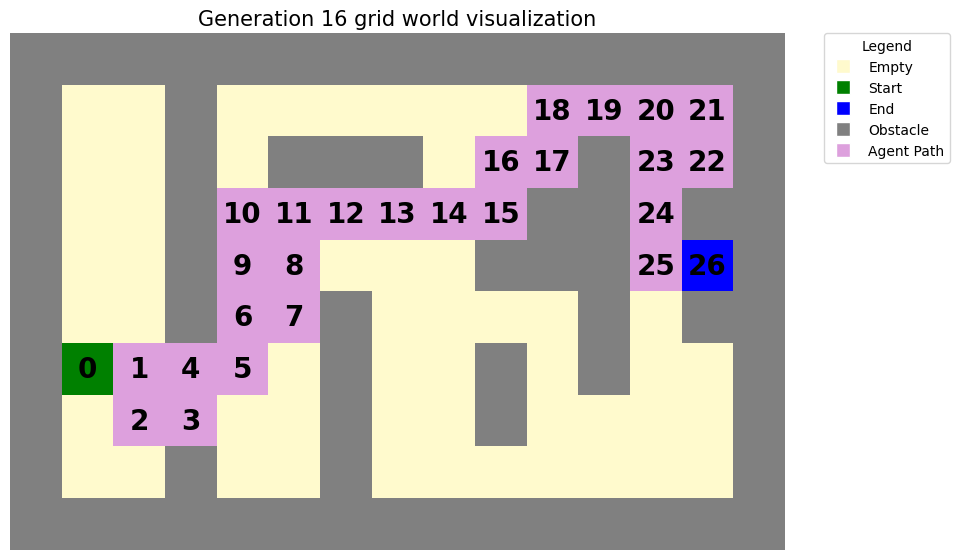

----------------------------------------------------------------------------------------------------

4. generation 23 grid world


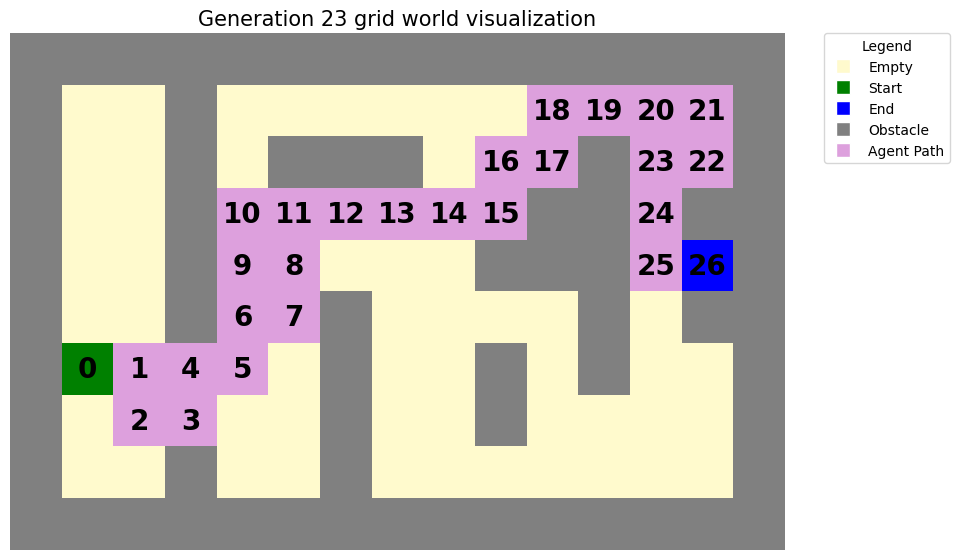

----------------------------------------------------------------------------------------------------

5. generation 31 grid world


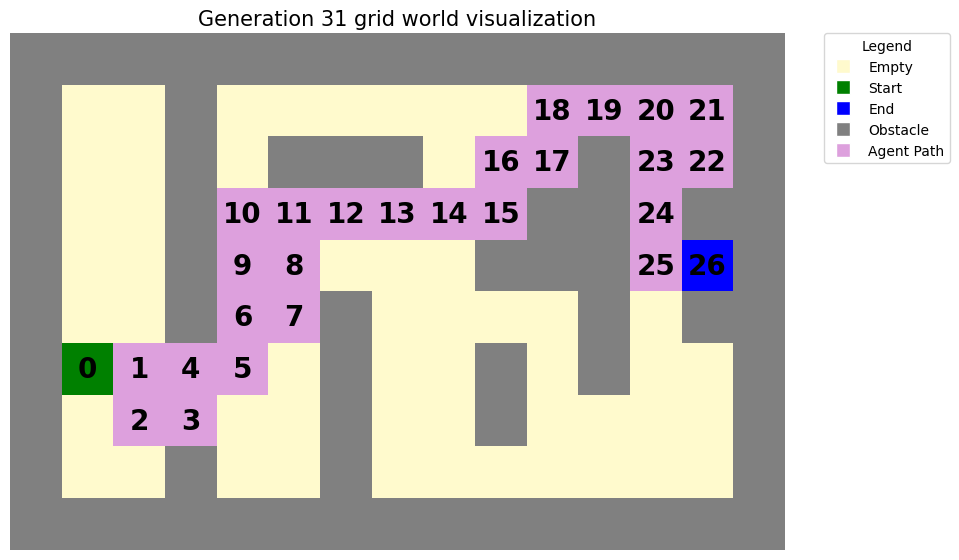

----------------------------------------------------------------------------------------------------

6. generation 38 grid world


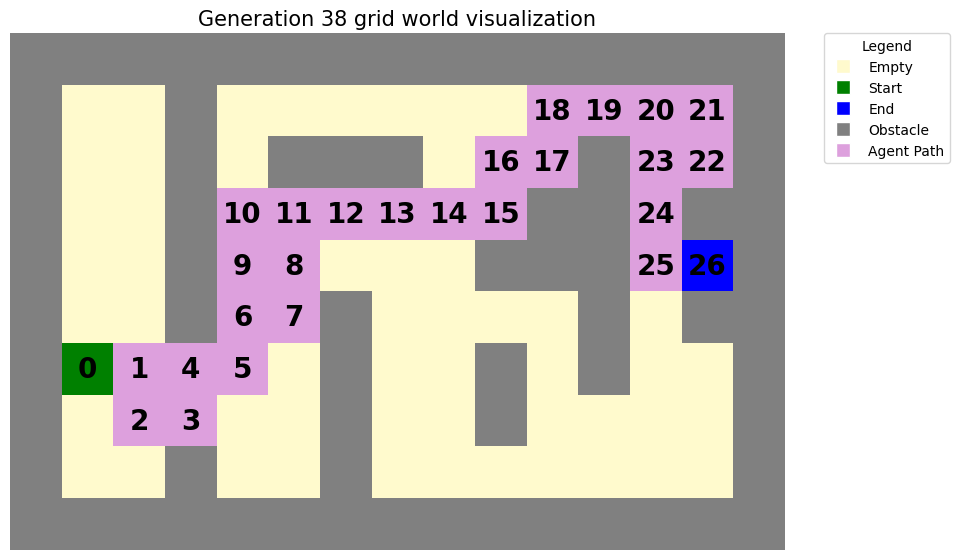

----------------------------------------------------------------------------------------------------

7. generation 46 grid world


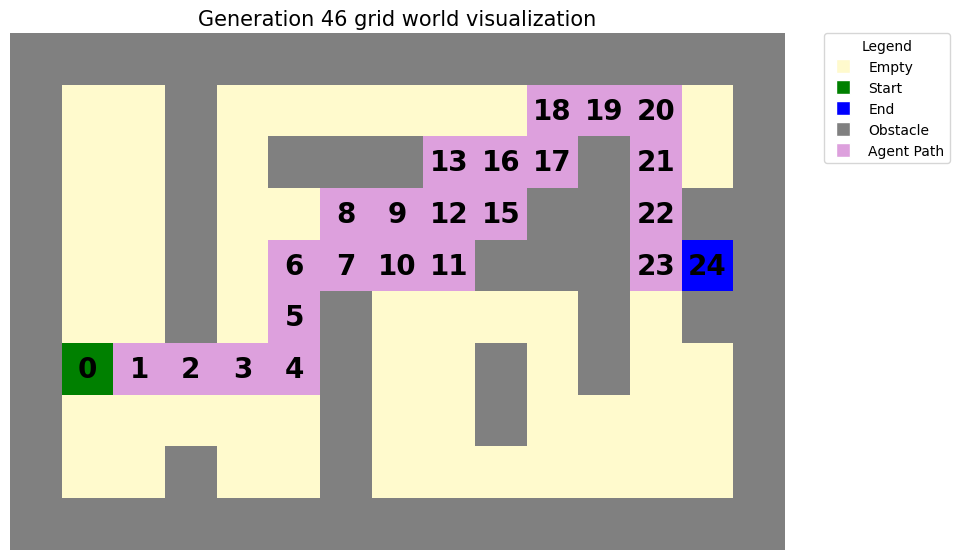

----------------------------------------------------------------------------------------------------

8. generation 53 grid world


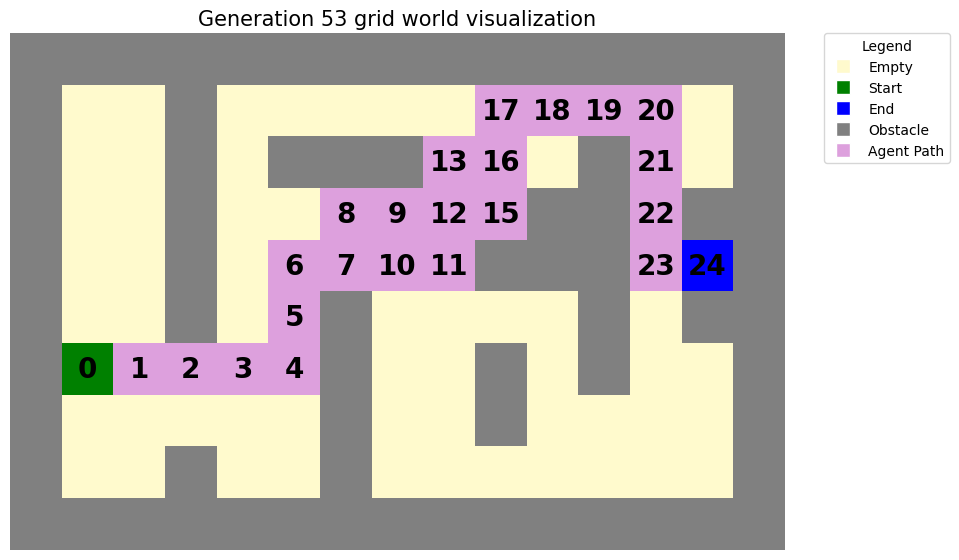

----------------------------------------------------------------------------------------------------

9. generation 61 grid world


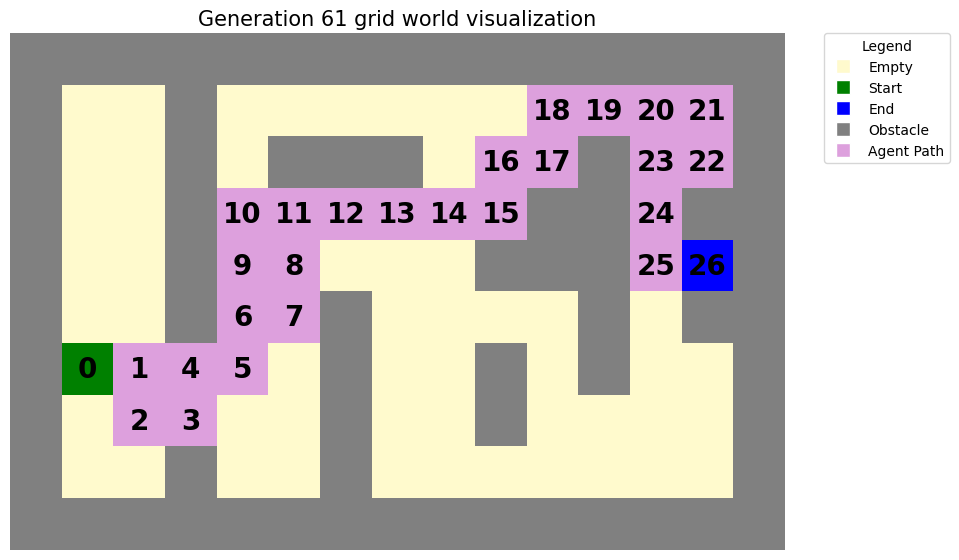

----------------------------------------------------------------------------------------------------

10. generation 68 grid world


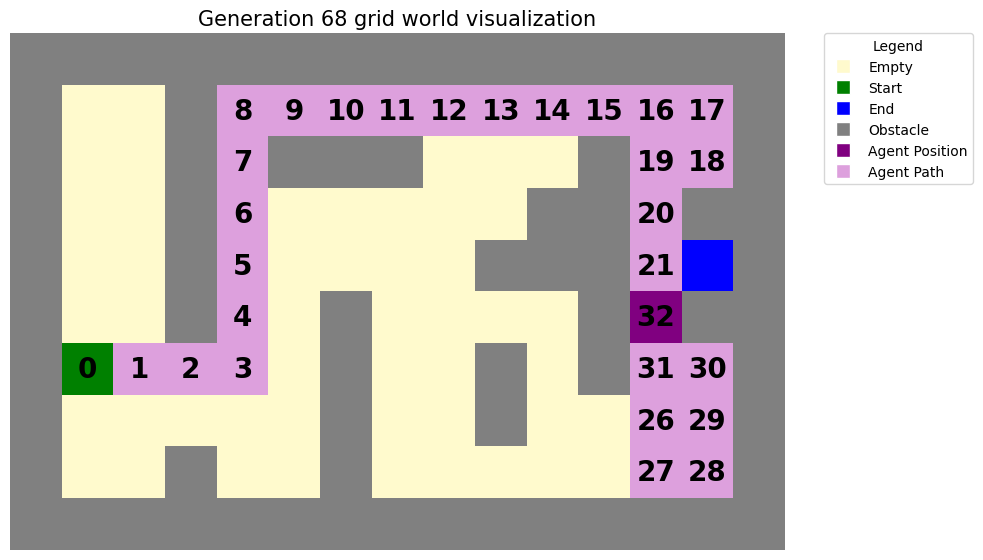

----------------------------------------------------------------------------------------------------



In [20]:
paths_progression_indices = fn.get_indices(best_generation-1)

for counter, index in enumerate(paths_progression_indices, 1):
    print(f"{counter}. generation {index + 1} grid world")
    title = f"Generation {index + 1} grid world visualization"
    fn.grid_world_visualization(best_grid_worlds[index], agent_path=best_population_paths[index], title=title, agent_flag=1)
    print(LINE)
    print()

In [21]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=HYBRID_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    indices_list=paths_progression_indices,  
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(HYBRID_RESULTS_PATH, HYBRID_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 10/10 [02:22<00:00, 14.22s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/non-reentrant fields/hybrid_results.mp4
Video creation finished!


[libx264 @ 0x55cbae333180] frame I:2     Avg QP: 8.27  size: 27192
[libx264 @ 0x55cbae333180] frame P:164   Avg QP:15.63  size:  2090
[libx264 @ 0x55cbae333180] frame B:110   Avg QP:14.79  size:   472
[libx264 @ 0x55cbae333180] consecutive B-frames: 27.9% 51.4% 16.3%  4.3%
[libx264 @ 0x55cbae333180] mb I  I16..4: 80.3%  4.5% 15.2%
[libx264 @ 0x55cbae333180] mb P  I16..4:  1.4%  0.3%  0.9%  P16..4:  1.5%  0.2%  0.1%  0.0%  0.0%    skip:95.5%
[libx264 @ 0x55cbae333180] mb B  I16..4:  0.6%  0.2%  0.2%  B16..8:  1.9%  0.1%  0.0%  direct: 0.1%  skip:96.8%  L0:52.2% L1:47.3% BI: 0.5%
[libx264 @ 0x55cbae333180] 8x8 transform intra:11.2% inter:56.4%
[libx264 @ 0x55cbae333180] coded y,uvDC,uvAC intra: 15.8% 38.0% 32.6% inter: 0.4% 0.7% 0.5%
[libx264 @ 0x55cbae333180] i16 v,h,dc,p: 67% 32%  2%  0%
[libx264 @ 0x55cbae333180] i8 v,h,dc,ddl,ddr,vr,hd,vl,hu: 20% 14% 58%  2%  1%  1%  1%  2%  1%
[libx264 @ 0x55cbae333180] i4 v,h,dc,ddl,ddr,vr,hd,vl,hu: 38% 25% 22%  3%  2%  3%  2%  3%  2%
[libx264 @ 0x

In [22]:
Video(HYBRID_VIDEO_PATH, embed=True)